<a href="https://colab.research.google.com/github/emmayeh-0211/2021AI_ml/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [23]:
# DataFrame：表格. Series：一行/一列
df = pd.DataFrame(iris['data'],
                  columns=iris['feature_names'])
df['ans'] = iris['target']
df.to_csv('iris.csv', encoding='utf-8', index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
# sklearn前：pandas.DataFrame
# sklearn後：np.array
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(['ans'], axis=1)), np.array(df['ans'])
# 90% x, 10% x, 90% y, 10% y）
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(135, 4)
(15, 4)
(135,)
(15,)


In [25]:
# 使用決策樹這個演算法訓練模型
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2) # 創造模型
                                          # 可以透過設定模型深度，來預防過擬合的情形產生
clf.fit(x_train, y_train) # 餵資料給模型

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(223.2, 453.0, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [43, 46, 46]\nclass = versicolor'),
 Text(111.6, 271.8, 'gini = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = setosa'),
 Text(334.79999999999995, 271.8, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 92\nvalue = [0, 46, 46]\nclass = versicolor'),
 Text(223.2, 90.59999999999997, 'gini = 0.15\nsamples = 49\nvalue = [0, 45, 4]\nclass = versicolor'),
 Text(446.4, 90.59999999999997, 'gini = 0.045\nsamples = 43\nvalue = [0, 1, 42]\nclass = virginica')]

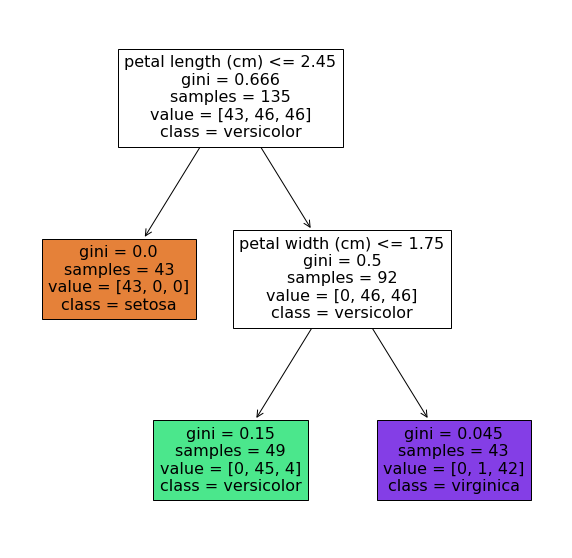

In [26]:
# 把模型結果畫出來
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf, 
          feature_names=iris["feature_names"], 
          class_names=iris["target_names"],
          filled=True)

In [27]:
# 將當初預留的10%測資丟進去模型進行測試
from sklearn.metrics import accuracy_score # metrics 度量標準的套件
pre = clf.predict(x_test) # 將測資丟進去模型後得到的答案
accuracy_score(pre, y_test) # 將模型預測答案，與實際答案做比對，得到的正確率分數，正確率分數用metrics函式計算

0.9333333333333333